### Training of ML algorithms on our Original Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('Datasets/sp500_sentiment_non_weighted.csv')
data.Price_change = data.Price_change.astype(int)
data

,Unnamed: 0,date,Volume,Close,Positive,Negative,Neutral,Price_change
0,0,2010-01-05,1.111477e+07,1136.520020,0.157785,0.489590,0.352625,1
1,1,2010-01-06,9.592200e+06,1137.140015,0.159253,0.114102,0.726645,1
2,2,2010-01-07,1.264640e+07,1141.689941,0.441000,0.012006,0.546994,1
3,3,2010-01-08,1.508503e+07,1144.979980,0.039152,0.384472,0.576376,1
4,4,2010-01-11,7.396000e+06,1146.979980,0.114053,0.029774,0.856173,1
...,...,...,...,...,...,...,...,...
2603,2603,2020-06-05,2.503270e+07,3193.929932,0.567891,0.070503,0.361606,1
2604,2604,2020-06-08,2.303770e+07,3232.389893,0.523481,0.124646,0.351873,1
2605,2605,2020-06-09,2.969893e+07,3207.179932,0.296441,0.337487,0.366072,-1
2606,2606,2020-06-10,3.795272e+07,3190.139893,0.390972,0.240399,0.368628,-1


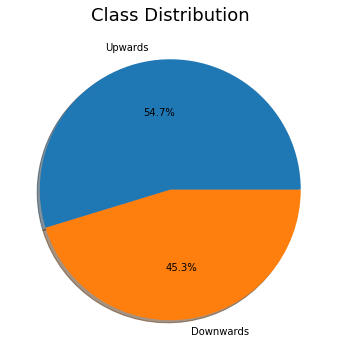

,Unnamed: 0,Volume,Close,Positive,Negative,Neutral,Price_change
count,2608.000000,2.608000e+03,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000
mean,1303.500000,1.658071e+07,2011.289005,0.251019,0.178131,0.570850,0.094325
std,753.009075,1.012408e+07,614.019978,0.132117,0.124667,0.156313,0.995732
min,0.000000,9.112000e+03,1022.580017,0.007660,0.008018,0.032180,-1.000000
25%,651.750000,1.015416e+07,1405.375000,0.155623,0.084762,0.471117,-1.000000
50%,1303.500000,1.419585e+07,2021.200012,0.238662,0.156607,0.567077,1.000000
75%,1955.250000,2.006385e+07,2538.672485,0.327286,0.242390,0.672033,1.000000
max,2607.000000,1.087524e+08,3386.149902,0.891684,0.960160,0.949033,1.000000


In [3]:
ones = len(data[data['Price_change']==1])
minus = len(data[data['Price_change']==-1])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[ones, minus], labels=['Upwards','Downwards'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution', fontsize=18)
plt.show()

data.describe()

In [4]:
# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral']])
y = np.array(data['Price_change'])
# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  shuffle=True)

print(f"Train data shapes X:{X_train.shape} , y:{y_train.shape}")
print(f"Test data shapes X:{X_test.shape} , y:{y_test.shape}")

Train data shapes X:(1825, 3) , y:(1825,)
Test data shapes X:(783, 3) , y:(783,)


#### Evaluation metrics 

In [5]:
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True),
           'precision' : make_scorer(precision_score, zero_division=0),
           'recall' : make_scorer(recall_score, average='macro')  }
          

### Data points scatter plot. The distribution of data seems almost random without visible patterns. 

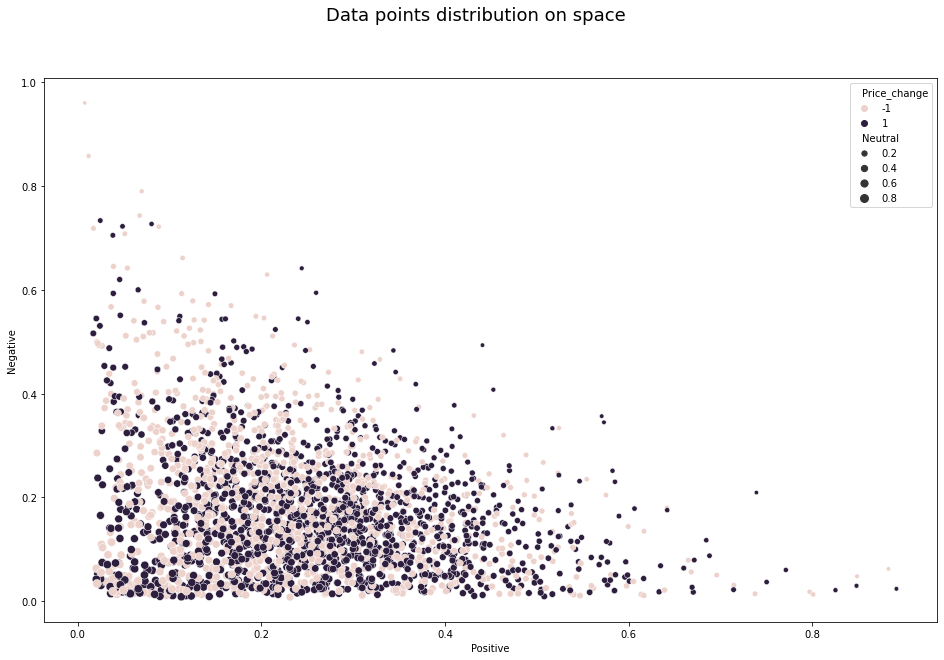

In [19]:
fig , ax = plt.subplots(figsize=(16,10))
fig.suptitle("Data points distribution on space", fontsize=18)
sns.scatterplot(data=data, x="Positive", y="Negative", size='Neutral', hue = 'Price_change')
plt.show()

### Logistic Regression

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  newton-cg
Mean accs :  0.5698630136986302
Mean f1_macro 0.4973631055704928
Mean precision 0.569739231936124
Mean recall 0.5393528366549798


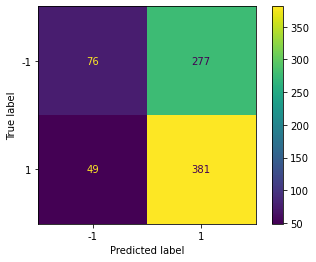

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  lbfgs
Mean accs :  0.5698630136986302
Mean f1_macro 0.4973631055704928
Mean precision 0.569739231936124
Mean recall 0.5393528366549798


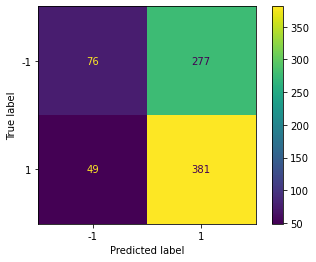

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  liblinear
Mean accs :  0.5698630136986302
Mean f1_macro 0.4973631055704928
Mean precision 0.569739231936124
Mean recall 0.5393528366549798


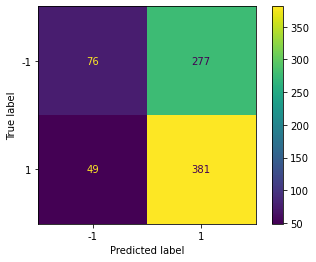

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  sag
Mean accs :  0.5698630136986302
Mean f1_macro 0.4973631055704928
Mean precision 0.569739231936124
Mean recall 0.5393528366549798


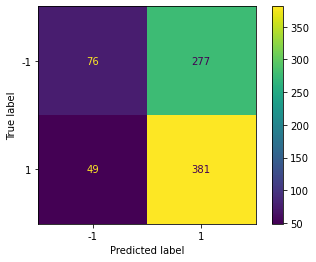

--------------------------------------------------------------------------------------------------------------
Training Logistic Regression with solver  saga
Mean accs :  0.5698630136986302
Mean f1_macro 0.4973631055704928
Mean precision 0.569739231936124
Mean recall 0.5393528366549798


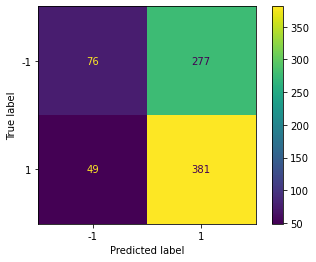

In [7]:
for solver in [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] :
    print("-----------"*10)
    print("Training Logistic Regression with solver ",solver)
    logisticRegr = LogisticRegression(penalty='l2', solver=solver)
    logisticRegr.fit(X_train, y_train)

    # predict model
    # Predict for One Observation
    logisticRegr.predict(X_test[0].reshape(1,-1))

    cv_scores = cross_validate(logisticRegr, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)
    
    predictions = logisticRegr.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logisticRegr.classes_)
    disp.plot()
    plt.show()

### All logistic regression solver provide very similar results. 

In [8]:
logisticRegr = LogisticRegression(penalty='l2', solver='liblinear')
logisticRegr.fit(X_train, y_train)
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.5836526181353767


## Nearest Neighbors

------------------------------------------------------------------------------------------
Training with k =  2
Mean accs :  0.530958904109589
Mean f1_macro 0.5191219962810127
Mean precision 0.631587560359743
Mean recall 0.5499748514386463


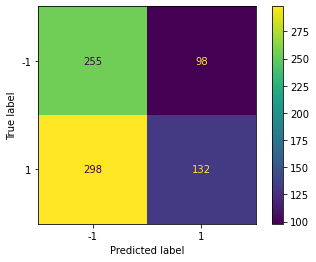

------------------------------------------------------------------------------------------
Training with k =  5
Mean accs :  0.5408219178082192
Mean f1_macro 0.5325173983464604
Mean precision 0.5742039724506844
Mean recall 0.533054716811513


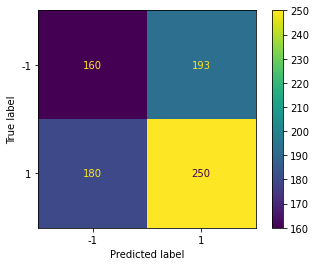

------------------------------------------------------------------------------------------
Training with k =  10
Mean accs :  0.52
Mean f1_macro 0.5188114205004621
Mean precision 0.5663310581343368
Mean recall 0.5199587477364919


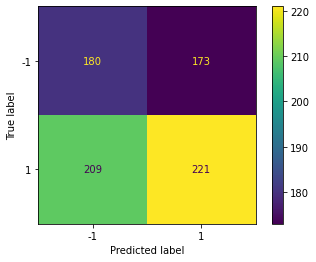

------------------------------------------------------------------------------------------
Training with k =  50
Mean accs :  0.5610958904109589
Mean f1_macro 0.5342477763682079
Mean precision 0.5776016280818054
Mean recall 0.5438862466769774


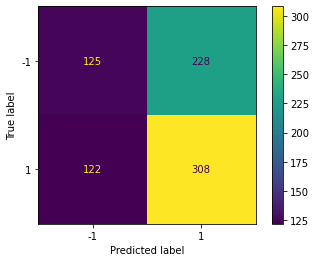

------------------------------------------------------------------------------------------
Training with k =  100
Mean accs :  0.5649315068493151
Mean f1_macro 0.5218433020607631
Mean precision 0.5745314164429989
Mean recall 0.5420984788858494


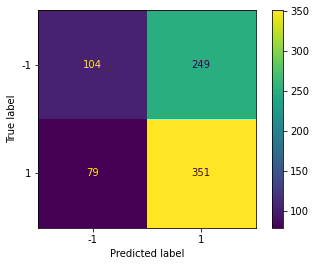

------------------------------------------------------------------------------------------
Training with k =  200
Mean accs :  0.5731506849315069
Mean f1_macro 0.5162249877277956
Mean precision 0.5754990262944568
Mean recall 0.5462477777716622


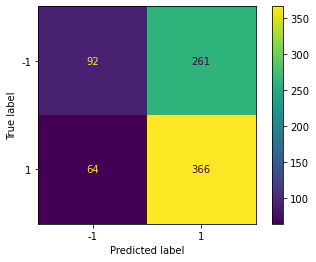

In [9]:
for k in [2, 5 ,10, 50, 100, 200]:
    print("---------"*10)
    print("Training with k = ",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Cross 5 fold validation
    cv_scores = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = knn.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn.classes_)
    disp.plot()
    plt.show()

### Choosing k=100 as optimal nearest neighbors parameter

In [16]:
knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)
# Use score method to get accuracy of model
score = knn.score(X_test, y_test)
print("Accuracy on test set : ",score)

Accuracy on test set :  0.5849297573435505


## SVM 

------------------------------------------------------------------------------------------
Training SVM with kernel  poly
Mean accs :  0.5687671232876712
Mean f1_macro 0.4728092254161339
Mean precision 0.5653828163735494
Mean recall 0.533853723711658


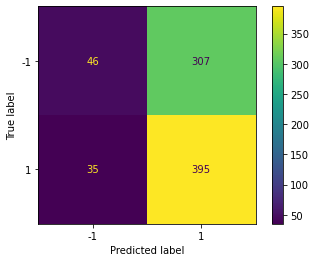

------------------------------------------------------------------------------------------
Training SVM with kernel  sigmoid
Mean accs :  0.5298630136986302
Mean f1_macro 0.4000590431515505
Mean precision 0.5413661689121582
Mean recall 0.49105063011295985


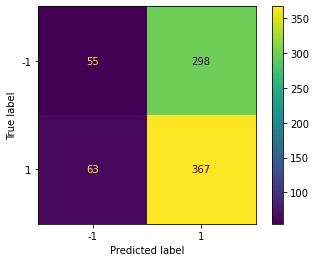

------------------------------------------------------------------------------------------
Training SVM with kernel  linear
Mean accs :  0.5512328767123288
Mean f1_macro 0.38268331071049533
Mean precision 0.5500194613451815
Mean recall 0.5072814694135153


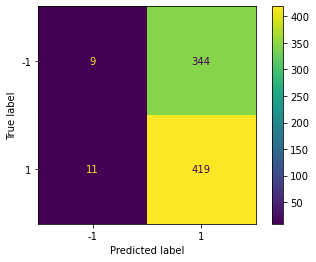

------------------------------------------------------------------------------------------
Training SVM with kernel  rbf
Mean accs :  0.576986301369863
Mean f1_macro 0.5062979417014101
Mean precision 0.5749301617540303
Mean recall 0.5469221188087205


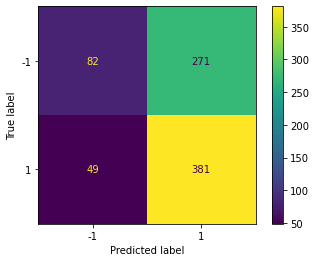

In [11]:
for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    print("---------"*10)
    print("Training SVM with kernel ", kernel)
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    
     # Cross 5 fold validation
    cv_scores = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)

    # cONFUSION matrix
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
    disp.plot()
    plt.show()

### Choosing kernel rbf as it offers the best mean accuracy on cross validation as well as a balanced confusion matrix. 

In [12]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf.predict(X_test)
print(f'Kernel: rbf, score: {clf.score(X_test, y_test)}')

Kernel: rbf, score: 0.5913154533844189


## Random Forest Classifier

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 2
Mean accs :  0.5199358733940771
Mean f1_macro 0.4662499111058824
Mean precision 0.5626025217707422
Mean recall 0.5110827149040091


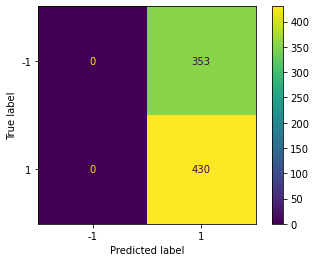

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 3
Mean accs :  0.5759488457946331
Mean f1_macro 0.5256656229492614
Mean precision 0.5795977874155727
Mean recall 0.5505661743789998


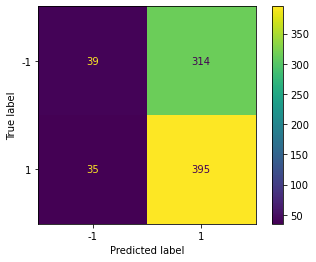

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 5
Mean accs :  0.5774843544318691
Mean f1_macro 0.5299819553136867
Mean precision 0.581250684283877
Mean recall 0.5527700336527784


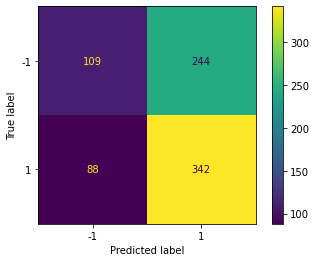

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 10
Mean accs :  0.5725027761231349
Mean f1_macro 0.5234507898002243
Mean precision 0.5780989399954304
Mean recall 0.5479227968364025


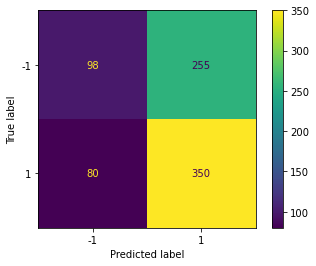

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 15
Mean accs :  0.5694295526580919
Mean f1_macro 0.5161111538818142
Mean precision 0.5753108785974861
Mean recall 0.543874182254697


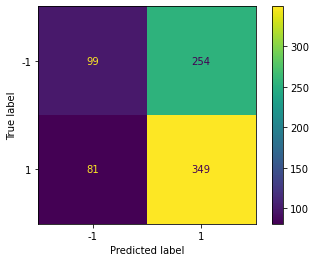

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 20
Mean accs :  0.5671307020833792
Mean f1_macro 0.5175941645899875
Mean precision 0.5744963583405499
Mean recall 0.5423787226147234


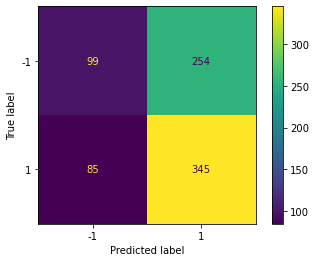

------------------------------------------------------------------------------------------
Training Random Forest with criterion  entropy ,  nodes = 50
Mean accs :  0.560229002581243
Mean f1_macro 0.5210735195159412
Mean precision 0.5740564256553352
Mean recall 0.5390818522707432


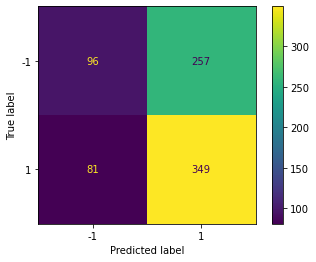

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 2
Mean accs :  0.5199358733940771
Mean f1_macro 0.4662499111058824
Mean precision 0.5626025217707422
Mean recall 0.5110827149040091


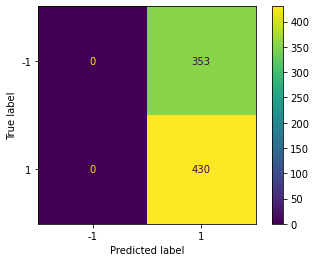

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 3
Mean accs :  0.5759488457946331
Mean f1_macro 0.5256656229492614
Mean precision 0.5795977874155727
Mean recall 0.5505661743789998


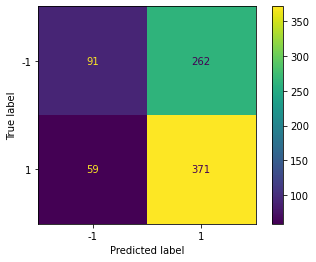

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 5
Mean accs :  0.5763319875570853
Mean f1_macro 0.5283149451734396
Mean precision 0.5803346967905473
Mean recall 0.5514988472121005


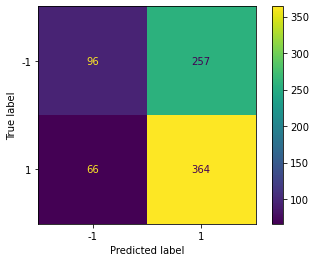

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 10
Mean accs :  0.5705804487391621
Mean f1_macro 0.516621526001668
Mean precision 0.575716410448908
Mean recall 0.5447811105924906


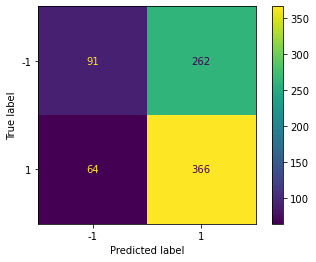

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 15
Mean accs :  0.5652149932711187
Mean f1_macro 0.5054292437504166
Mean precision 0.5708695872479176
Mean recall 0.5378334728502413


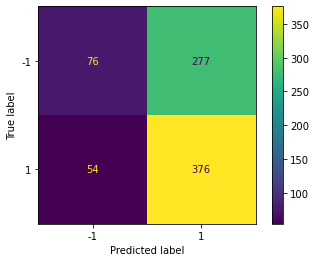

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 20
Mean accs :  0.5571535729256293
Mean f1_macro 0.4997164966079627
Mean precision 0.567316799190985
Mean recall 0.5303872928037044


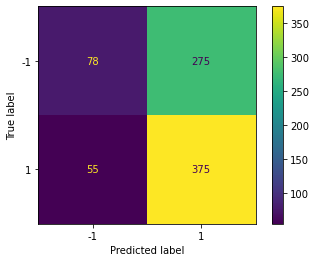

------------------------------------------------------------------------------------------
Training Random Forest with criterion  gini ,  nodes = 50
Mean accs :  0.5437362572712363
Mean f1_macro 0.5062394482820716
Mean precision 0.5620836444439933
Mean recall 0.5225280982262204


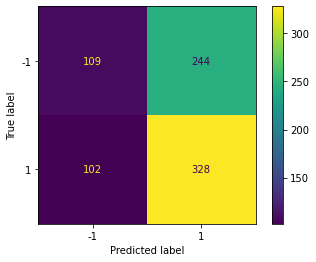

In [13]:
for criterion in ['entropy', 'gini'] :
   # print("---------"*10)
   # print("Training Random Forest with criterion ", criterion)
    
    
    for leafs in [2, 3, 5, 10, 15, 20, 50] :
        print("---------"*10)
        print("Training Random Forest with criterion ", criterion, ",  nodes =",leafs)

        rf = DecisionTreeClassifier(criterion=criterion, max_leaf_nodes=leafs)
        rf.fit(X_train, y_train)

         # Cross 5 fold validation
        cv_scores = cross_validate(rf, X, y, cv=5, scoring=scoring)
        accs = cv_scores['test_accuracy'].mean()
        print("Mean accs : ",accs)
        f1_macros = cv_scores['test_f1_macro'].mean()
        print("Mean f1_macro", f1_macros)
        prec = cv_scores['test_precision'].mean()
        print("Mean precision", prec)
        recall = cv_scores['test_recall'].mean()
        print("Mean recall", recall)

        # cONFUSION matrix
        predictions = rf.predict(X_test)
        cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=rf.classes_)
        disp.plot()
        plt.show()

##### Choosing entropy as best criterion for random forest and number of leaf nodes restricted to  5 .

Accuracy on Test set for 'optimal' random forest is : 0.5759897828863346


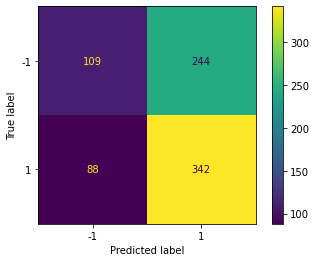

In [14]:
rf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("Accuracy on Test set for 'optimal' random forest is :", score)
# cONFUSION matrix
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=rf.classes_)
disp.plot()
plt.show()

In [15]:
rf.feature_importances_

array([0.35673765, 0.16551623, 0.47774612])

# Add Volume as feature

In [ ]:
# Normalize volume feature
data['Volume'] = (data['Volume'] - data['Volume'].min())/(data['Volume'].max()-data['Volume'].min())
data

# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral', 'Volume']])
y = np.array(data['Price_change'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True)


# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

cv_scores = cross_validate(logisticRegr, X, y, cv=5, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)

predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

## SVM

from sklearn import svm

for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    clf.predict(X_test)
    print(f'Kernel: {kernel}, score: {clf.score(X_test, y_test)}')

## Decision Tree

clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

clf.feature_importances_